In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('EV Dataset.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32 non-null     int64  
 1   State Name                      32 non-null     object 
 2   Two Wheeler                     32 non-null     int64  
 3   Three Wheeler                   32 non-null     int64  
 4   Four Wheeler                    32 non-null     int64  
 5   Goods Vehicles                  32 non-null     int64  
 6   Public Service Vehicle          32 non-null     int64  
 7   Special Category Vehicles       32 non-null     int64  
 8   Ambulance/Hearses               32 non-null     int64  
 9   Construction Equipment Vehicle  32 non-null     int64  
 10  Other                           32 non-null     int64  
 11  Grand Total                     32 non-null     int64  
 12  total-charging-stations         24 non

In [4]:
data.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30,81,0,40,0,0,0,7,159,NaN
1,1,Arunachal Pradesh,14,0,5,0,0,0,0,0,1,20,NaN
2,2,Assam,721,47041,161,7,15,0,0,0,2,47947,10.0
3,3,Bihar,5003,59079,114,11,26,0,0,0,8,64241,9.0
4,4,Chandigarh,298,1410,182,0,40,0,0,0,1,1931,2.0


In [6]:
data = data.dropna()

In [7]:
data.isnull()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False


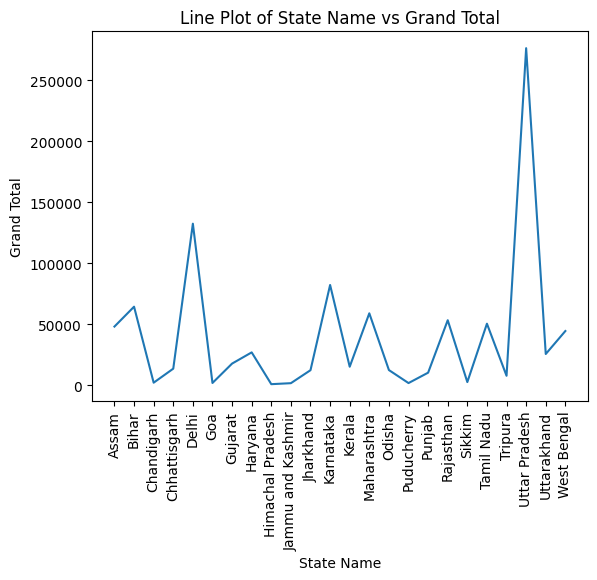

In [8]:
# Assuming 'data' is a Pandas DataFrame with columns 'State Name' and 'Grand Total'
plt.plot(data['State Name'], data['Grand Total'])
plt.xlabel('State Name')
plt.ylabel('Grand Total')
plt.title('Line Plot of State Name vs Grand Total')
plt.xticks(rotation=90)
plt.show()

# Exploratory Data Analysis

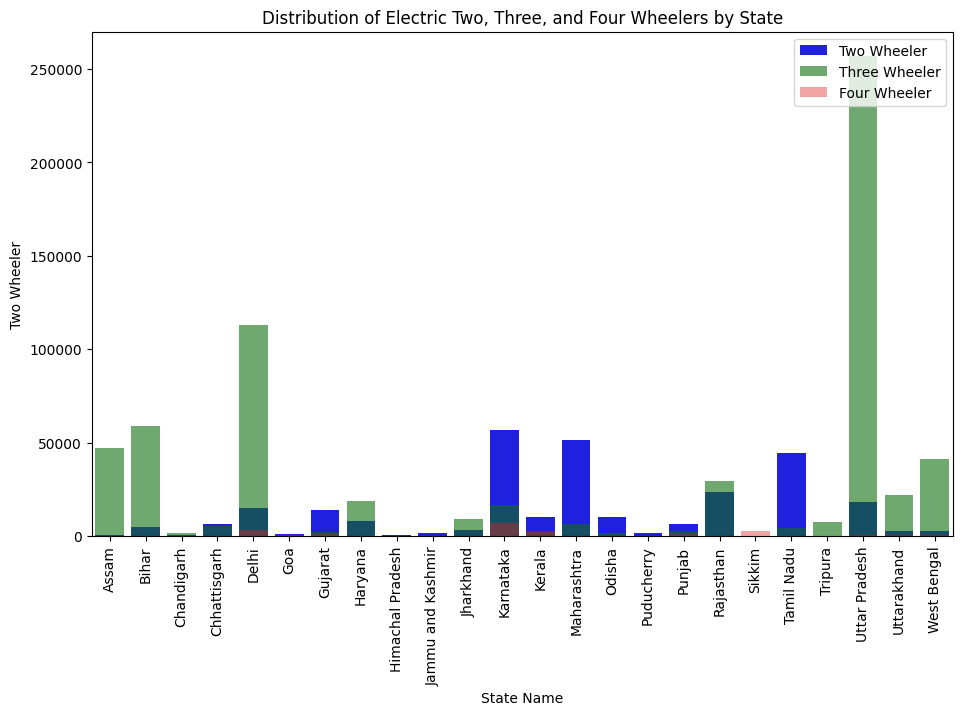

In [23]:
# 1. Distribution of Two, Three, and Four Wheelers across states
plt.figure(figsize=(10, 6))
sns.barplot(x='State Name', y='Two Wheeler', data=data, color='b', label='Two Wheeler')
sns.barplot(x='State Name', y='Three Wheeler', data=data, color='g', label='Three Wheeler', alpha=0.6)
sns.barplot(x='State Name', y='Four Wheeler', data=data, color='r', label='Four Wheeler', alpha=0.4)
plt.title('Distribution of Electric Two, Three, and Four Wheelers by State')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

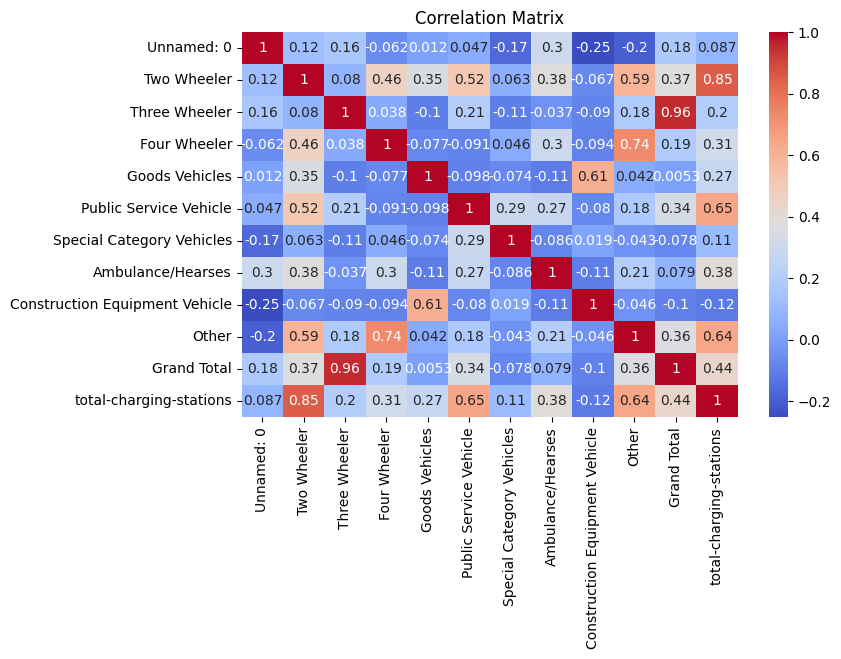

In [22]:
# 2. Correlation between vehicles and charging stations
plt.figure(figsize=(8,5))
sns.heatmap(data.drop(columns=['State Name']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-13-5aab551a7493>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State Name', y='Grand Total', data=top_10_states, palette='Blues_d')


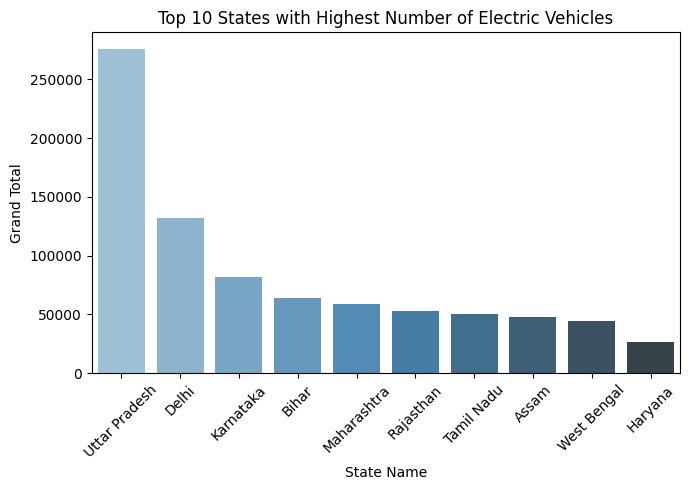

In [13]:
# 3. Top 10 States with Highest Number of Electric Vehicles
top_10_states = data.nlargest(10, 'Grand Total')

plt.figure(figsize=(7, 5))
sns.barplot(x='State Name', y='Grand Total', data=top_10_states, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Top 10 States with Highest Number of Electric Vehicles')
plt.tight_layout()
plt.show()


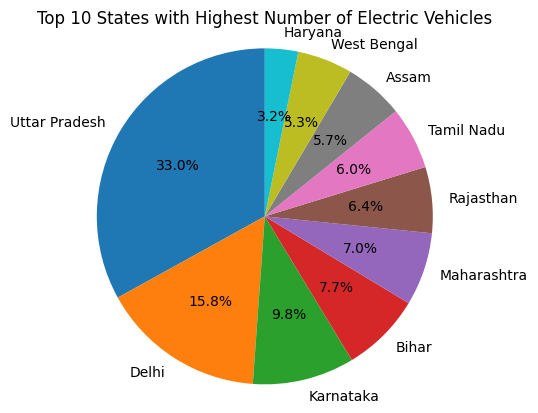

In [19]:
plt.pie(top_10_states['Grand Total'], labels=top_10_states['State Name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 States with Highest Number of Electric Vehicles')
plt.axis('equal')
plt.show()

<ipython-input-14-027aa9ae8a81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State Name', y='total-charging-stations', data=data, palette='viridis')


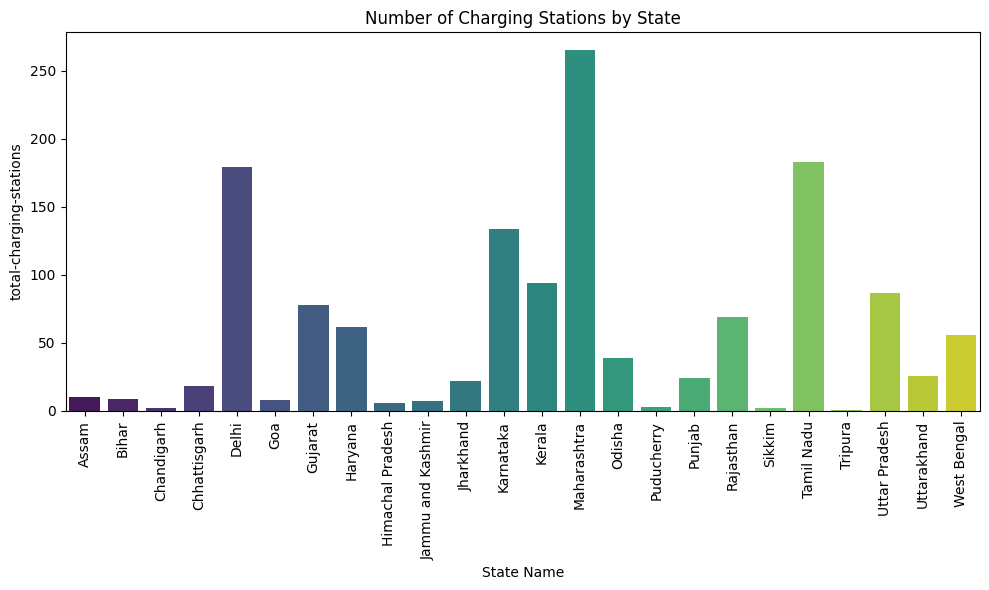

In [14]:
# 4. Number of Charging Stations by State
plt.figure(figsize=(10, 6))
sns.barplot(x='State Name', y='total-charging-stations', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Charging Stations by State')
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

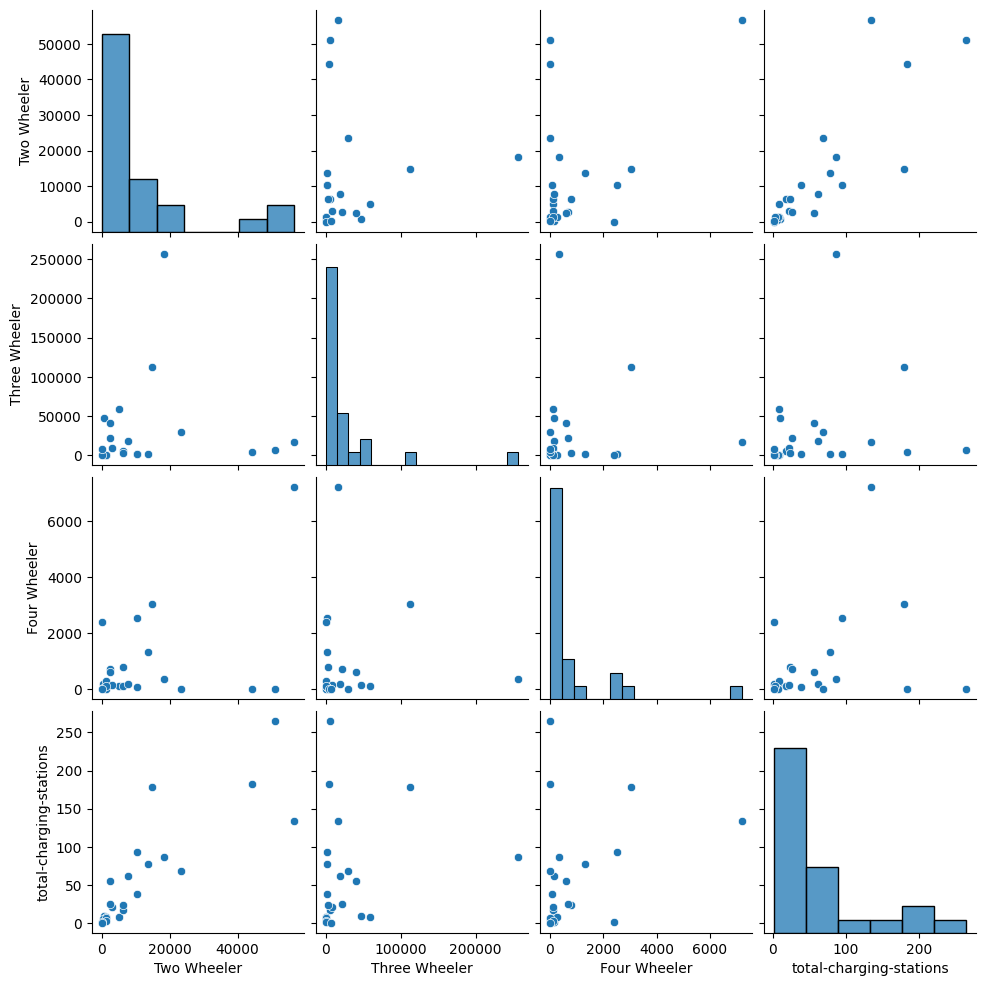

In [17]:
# 5. Pairplot to explore relationships
plt.figure(figsize=(6, 6))
sns.pairplot(data[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'total-charging-stations']])
plt.show()

In [16]:
# Step 4: Insights
# Print out the states with the most and least charging stations
most_charging_stations = data.nlargest(5, 'total-charging-stations')
least_charging_stations = data.nsmallest(5, 'total-charging-stations')

print("Top 5 States with Most Charging Stations:")
print(most_charging_stations[['State Name', 'total-charging-stations']])

print("\nTop 5 States with Least Charging Stations:")
print(least_charging_stations[['State Name', 'total-charging-stations']])


Top 5 States with Most Charging Stations:
     State Name  total-charging-stations
16  Maharashtra                    265.0
26   Tamil Nadu                    183.0
6         Delhi                    179.0
13    Karnataka                    134.0
14       Kerala                     94.0

Top 5 States with Least Charging Stations:
          State Name  total-charging-stations
27           Tripura                      1.0
4         Chandigarh                      2.0
25            Sikkim                      2.0
22        Puducherry                      3.0
10  Himachal Pradesh                      6.0


# Principal Component Analysis (PCA)

In [27]:
# Standardize the data
scaler = StandardScaler()
ev_data_scaled = scaler.fit_transform(data.drop(columns=['State Name']))

# Perform PCA
pca = PCA()
#The 'State Name' column contains text values that need to be removed before applying PCA.
ev_data_pca = pca.fit_transform(ev_data_scaled)

# Perform PCA
pca = PCA(n_components=2)  # Set number of components to 2 for visualization
ev_data_pca_transformed = pca.fit_transform(ev_data_scaled)

Explained variance by each component: [0.3053038  0.15866242]


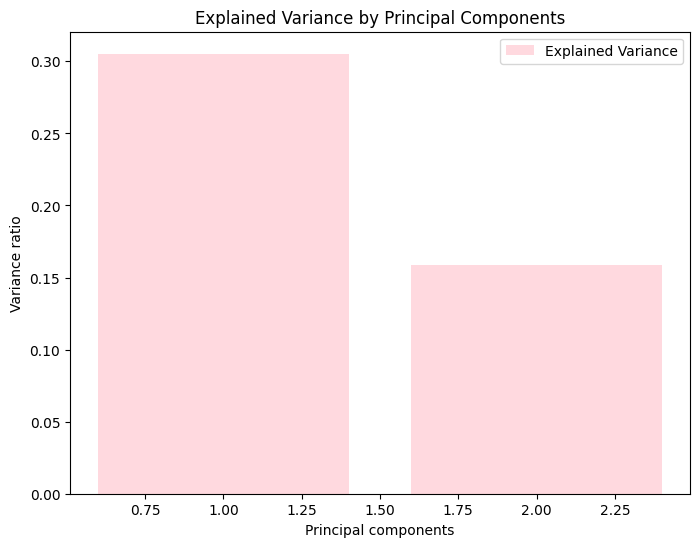

In [31]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance, alpha=0.6, color='pink', label='Explained Variance')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

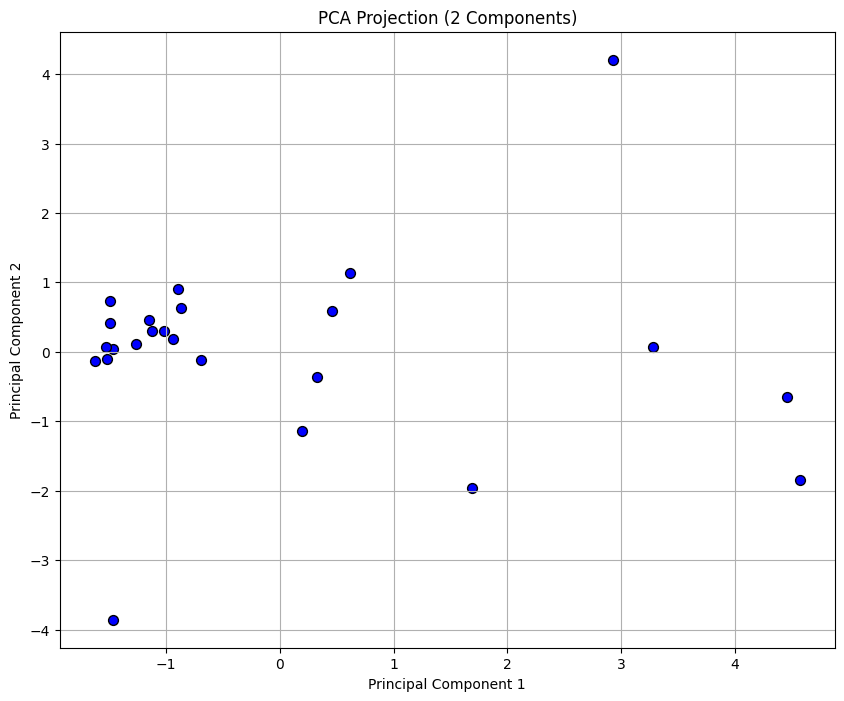

In [29]:
# Plot the data projected onto the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(ev_data_pca_transformed[:, 0], ev_data_pca_transformed[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Projection (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# K-Means Clustering

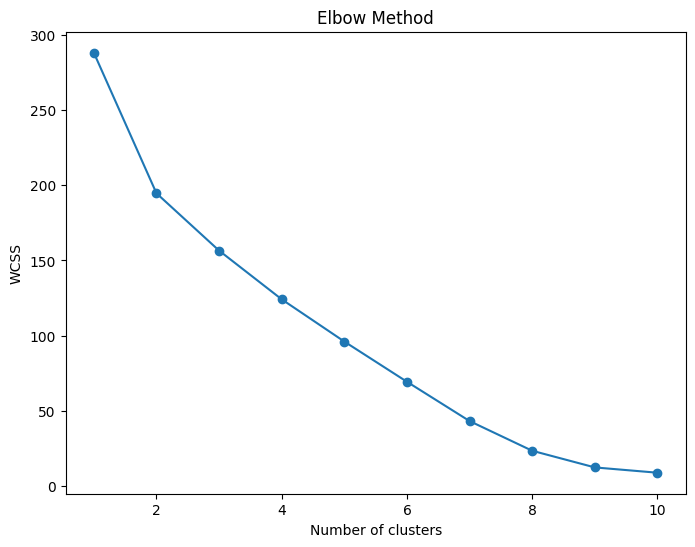

In [37]:
# Drop the unnecessary 'Unnamed: 0' and 'State Name' columns
ev_data_clustering = data.drop(columns=['Unnamed: 0', 'State Name'])

# Handle missing values by filling with 0 for 'total-charging-stations'
ev_data_clustering['total-charging-stations'].fillna(0, inplace=True)

# Standardize the data
scaler = StandardScaler()
ev_data_scaled = scaler.fit_transform(ev_data_clustering)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ev_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

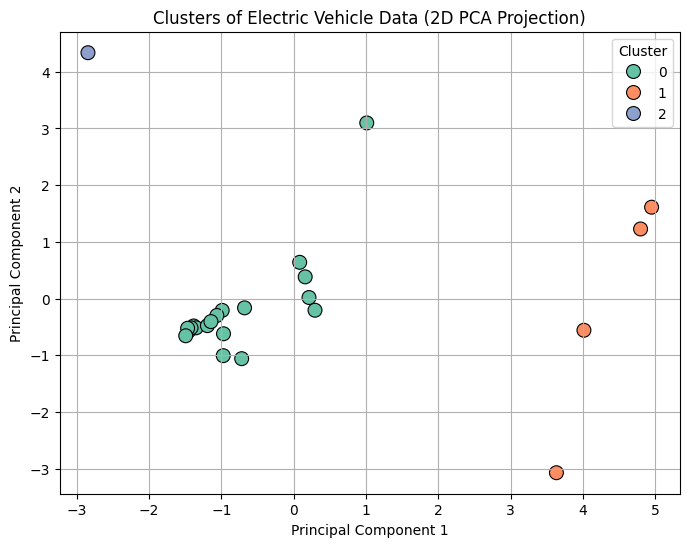

Cluster Centers (Centroids):
    Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles  \
0   7102.947368   13089.789474    511.842105       87.526316   
1  35227.750000   98155.750000   2658.250000       71.250000   
2   6424.000000    5341.000000    117.000000     1077.000000   

   Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses  \
0               38.210526                  19.631579           0.210526   
1              315.250000                   7.250000           0.500000   
2                1.000000                   0.000000           0.000000   

   Construction Equipment Vehicle       Other    Grand Total  \
0                        1.473684   34.894737   20886.526316   
1                        0.000000  909.000000  137345.000000   
2                      368.000000  100.000000   13428.000000   

   total-charging-stations  Cluster  
0                36.894737      1.0  
1               166.250000      2.0  
2                18.000000      0.0  
Numb

In [39]:
# Apply K-Means with the chosen number of clusters (let's say 3 based on the Elbow Method)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(ev_data_scaled)

# Add the cluster assignments to the original data
data['Cluster'] = clusters

# Visualization of the clusters using PCA (reduce to 2 dimensions for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(ev_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='Set2', s=100, edgecolor='k')
plt.title('Clusters of Electric Vehicle Data (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explore the cluster means (centroids)
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=ev_data_clustering.columns)
print("Cluster Centers (Centroids):")
print(cluster_centers_df)

# Optional: Show the number of states in each cluster
print("Number of states in each cluster:")
print(data['Cluster'].value_counts())

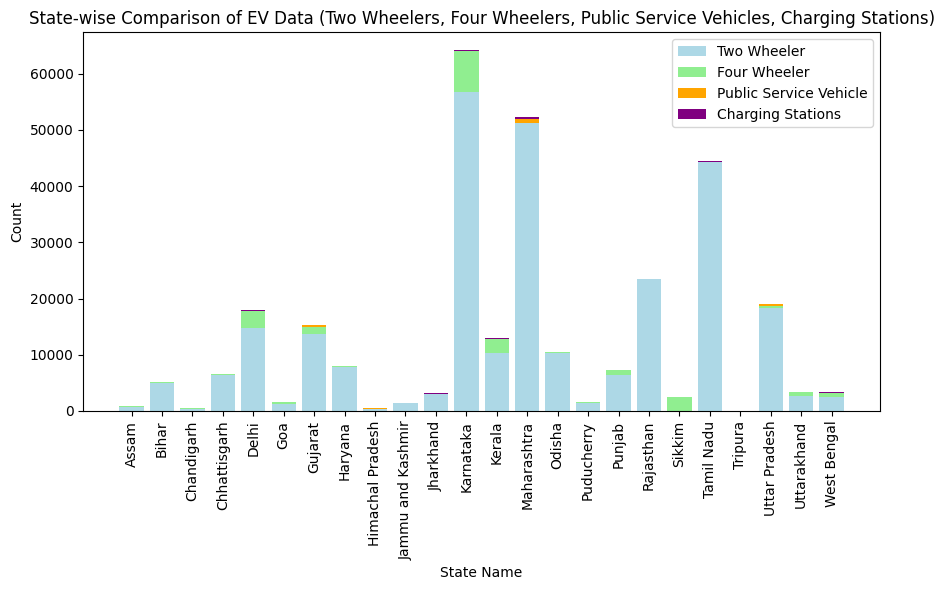

In [46]:
# Group by 'State Name' and summarize the data
state_wise_summary = data.groupby('State Name').agg({
    'Two Wheeler': 'sum',
    'Four Wheeler': 'sum',
    'Public Service Vehicle': 'sum',
    'total-charging-stations': 'sum'
}).reset_index()

# Create a stacked bar chart

# Set the size of the plot
plt.figure(figsize=(9, 6))

# Create the stacked bar chart
plt.bar(state_wise_summary['State Name'], state_wise_summary['Two Wheeler'], label='Two Wheeler', color='lightblue')
plt.bar(state_wise_summary['State Name'], state_wise_summary['Four Wheeler'], bottom=state_wise_summary['Two Wheeler'], label='Four Wheeler', color='lightgreen')
plt.bar(state_wise_summary['State Name'], state_wise_summary['Public Service Vehicle'], bottom=state_wise_summary['Two Wheeler'] + state_wise_summary['Four Wheeler'], label='Public Service Vehicle', color='orange')
plt.bar(state_wise_summary['State Name'], state_wise_summary['total-charging-stations'], bottom=state_wise_summary['Two Wheeler'] + state_wise_summary['Four Wheeler'] + state_wise_summary['Public Service Vehicle'], label='Charging Stations', color='purple')

# Add labels, title, and legend
plt.xlabel('State Name')
plt.ylabel('Count')
plt.title('State-wise Comparison of EV Data (Two Wheelers, Four Wheelers, Public Service Vehicles, Charging Stations)')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
